<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/COMPLEMENT_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
# Load dataset
df = pd.read_csv('/content/Ecommerce_product.csv')
print(df.head())

   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales Quality  
0             20      0.08    466    good  
1            663      0.33   1332    good  
2            459      0.31    252     bad  
3            475      0.49   1806    good  
4            831      0.23   1508    good  


In [ ]:
# Check the null values
print("Number of null values:", df.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Check the shape
print("Shape:", df.shape)

# Drop rows with null values
df.dropna(inplace=True)

Number of null values: ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
Quality          0
dtype: int64
Number of duplicate rows: 0
Shape: (1000, 10)


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col].head())

0    42
1    42
2    80
3    79
4    47
Name: ProductName, dtype: int64
0    11
1    11
2    11
3    11
4    11
Name: Category, dtype: int64
0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64


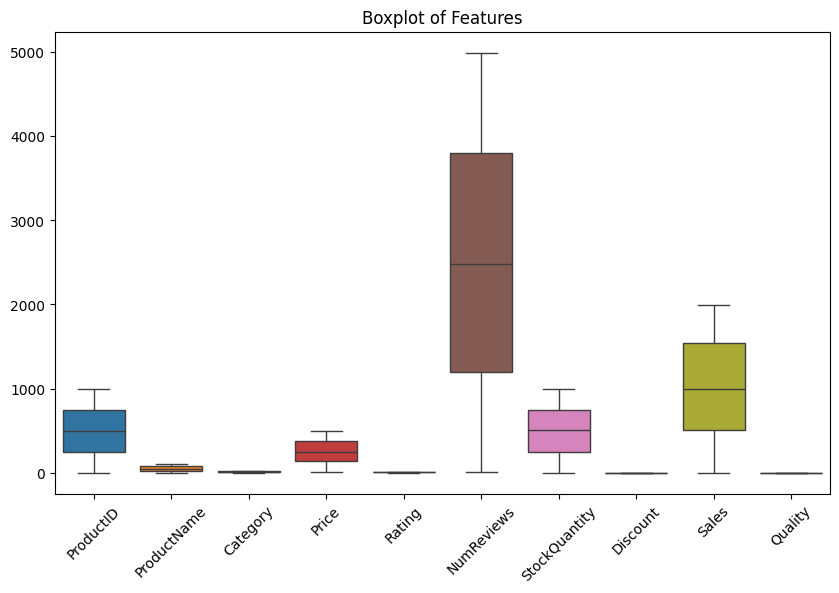

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()


# Define columns to check for outliers
columns_to_check = df.columns

In [ ]:
# Calculate Z-scores for each column
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Filter rows where any Z-score is greater than 3
outliers = df[(z_scores > 3).any(axis=1)]

# Remove outliers
data_no_outliers = df.drop(outliers.index)

# Print cleaned data
print(data_no_outliers)

     ProductID  ProductName  Category   Price  Rating  NumReviews  \
0            1           42        11  400.31     1.7        3772   
1            2           42        11  235.03     2.3        2919   
2            3           80        11  417.90     1.8        1184   
3            4           79        11  152.70     3.4        2047   
4            5           47        11  394.74     1.8        1267   
..         ...          ...       ...     ...     ...         ...   
995        996           89         4  207.72     2.3        1973   
996        997           37         4  268.60     3.2         841   
997        998           89         4   92.74     2.8        3454   
998        999           95         4  152.28     1.3        2850   
999       1000           89         4  136.53     2.0        4055   

     StockQuantity  Discount  Sales  Quality  
0               20      0.08    466        1  
1              663      0.33   1332        1  
2              459      0.31  

In [ ]:
# Describe the cleaned data
print(data_no_outliers.describe())

         ProductID  ProductName     Category       Price       Rating  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean    500.500000    48.943000    12.000000   253.77551     3.025600   
std     288.819436    29.318822     7.214711   141.40362     1.151004   
min       1.000000     0.000000     0.000000    10.11000     1.000000   
25%     250.750000    23.000000     6.000000   133.09250     2.100000   
50%     500.500000    49.000000    12.000000   251.31000     3.100000   
75%     750.250000    75.000000    18.000000   375.82750     4.000000   
max    1000.000000    99.000000    24.000000   499.74000     5.000000   

        NumReviews  StockQuantity     Discount        Sales      Quality  
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000  
mean   2498.753000     495.395000     0.251640  1011.037000     0.502000  
std    1463.241871     292.799253     0.146455   582.113466     0.500246  
min       3.000000       0.000000     0.00

In [ ]:
selected_features = ['StockQuantity','Sales']  # Replace with actual feature names
X = data_no_outliers[selected_features]
y = data_no_outliers['Quality']  # Replace with actual target column name

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

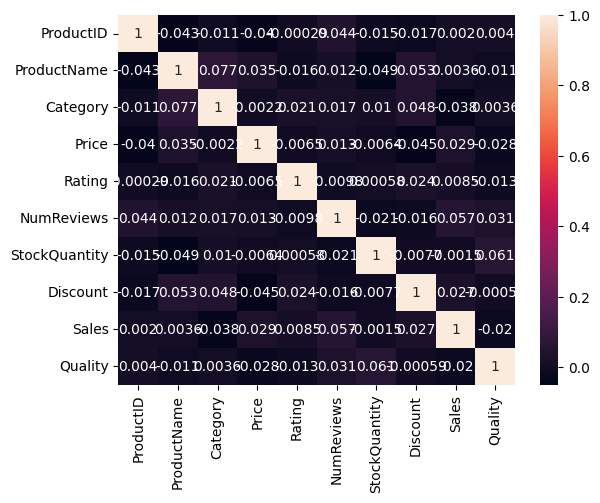

In [ ]:
# Plot the heatmap of correlation matrix
corr = data_no_outliers.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Fitting Naive Bayes to the Training set
classifier = ComplementNB()
classifier.fit(X_train, y_train)

ComplementNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Predictions on test set:\n", y_pred)

Predictions on test set:
 [0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1]


In [ ]:
# Predict output for a sample
sample_index = 4 # Choose any index from the test set
sample_features = X_test.iloc[sample_index].values.reshape(1, -1)  # Reshape the sample for prediction
predicted = classifier.predict(sample_features)
print("Sample Index:", sample_index)
print("Actual Value:", y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])

Sample Index: 4
Actual Value: 0
Predicted Value: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[51 46]
 [49 54]]


In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 52.5 %


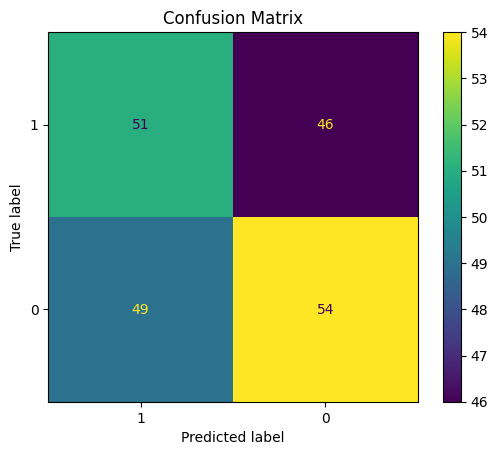

In [ ]:
# Display the confusion matrix
labels = y.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        97
           1       0.54      0.52      0.53       103

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.53       200



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


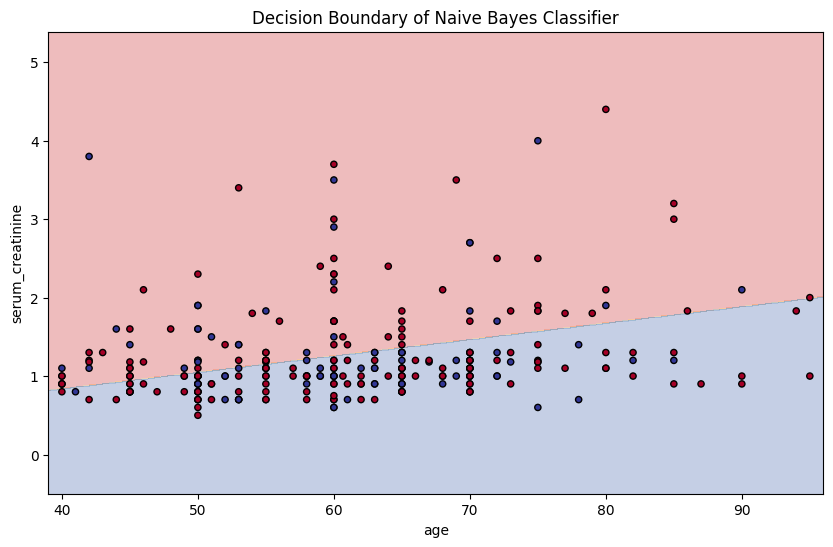

In [ ]:
# Plot decision boundary
plt.figure(figsize=(10, 6))
# Define the grid for the decision boundary
x_min, x_max = X[selected_features[0]].min() - 1, X[selected_features[0]].max() + 1
y_min, y_max = X[selected_features[1]].min() - 1, X[selected_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict Z values for the grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[selected_features[0]], X[selected_features[1]], c=Y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("Decision Boundary of Naive Bayes Classifier")
plt.show()
